### Riley Sallander

#### 0 



In [13]:
import pandas as pd 
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, geom_bar, facet_wrap, geom_line


avData = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/avocado-updated-2020.csv")

avData.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 1 

<p>The avacados data set contains 13 variables focused on the average price of an avacado in an area. The data spans from 01/04/15 to 05/17/20. The data includes: the date of observation, average price, total volume, #of avacado sold based on size (numerical indicator), total # of bags also broken down by bag size, type of avacado (organic/non-oraginc) year of observation, and geographical location. <p>


### 2 

In [14]:

# Define the lists for MetroArea, Region, and Other (Asked chat to help write the categorization function)
metroArea = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'Charlotte', 
              'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 
              'Great Lakes', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 
              'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 
              'New York', 'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 
              'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego', 
              'San Francisco', 'Seattle', 'South Carolina', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 
              'West Tex/New Mexico']

region = ['West', 'Southwest', 'Midsouth', 'Northeast', 'South Central', 'Southeast', 'West', 'plains']

# Function to categorize geography into new variable region_type 

#-----------

#input Vector: string a list, array of strings or pandas series of strings

#return String 


#-----------
def categorize_geography(geo):
    if geo in metroArea:
        return 'MetroArea'
    elif geo in region:
        return 'Region'
    else:
        return 'Other'

# Apply the function to create a new column 'region_type'
avData['region_type'] = avData['geography'].apply(categorize_geography)


# rename numerical values to sizes

avData = avData.rename(columns={'4046': 'small'})
avData = avData.rename(columns={'4225': 'large'})
avData = avData.rename(columns={'4770': 'extraLarge'})

# split the date variable 
avData['date'] = pd.to_datetime(avData['date'])

# Create new columns for year, month, and day
avData['year'] = avData['date'].dt.year
avData['month'] = avData['date'].dt.month
avData['day'] = avData['date'].dt.day


### 3 Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [15]:
## filter by year organic and region 
dfOrg2017 = avData[(avData['type']=='organic')
                     & (avData['year']==2017)
                     & (avData['region_type'] == 'Region')]

## group by the geographical region and total the small sales 
dfOrg2017Small = dfOrg2017.groupby('geography')['small'].sum().reset_index()

## sort the data so highest total is at the top 
dfOrg2017Small = dfOrg2017Small.sort_values(by='small',ascending=False)

## print the highest small sales
print(dfOrg2017Small.iloc[0])



geography          West
small        1870206.29
Name: 4, dtype: object
geography          West
small        1870206.29
Name: 4, dtype: object


<p> The region with the most small avacados sold in 2017 is the West region with 187026 avacados sold. <p>

### 4  In which month is the highest average volume of avocado sales?

In [16]:

## average the total volume by month 
dfMonth = avData.groupby('month')['total_volume'].mean().reset_index()

## find Month where the total volume 
highestMonth = dfMonth.loc[dfMonth['total_volume'].idxmax()]

print(highestMonth)


month           5.000000e+00
total_volume    1.123632e+06
Name: 4, dtype: float64
month           5.000000e+00
total_volume    1.123632e+06
Name: 4, dtype: float64


<p> The highest volume by month comes in the month of May at 1123632 avacados sold on average. <p> 

### 5 Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

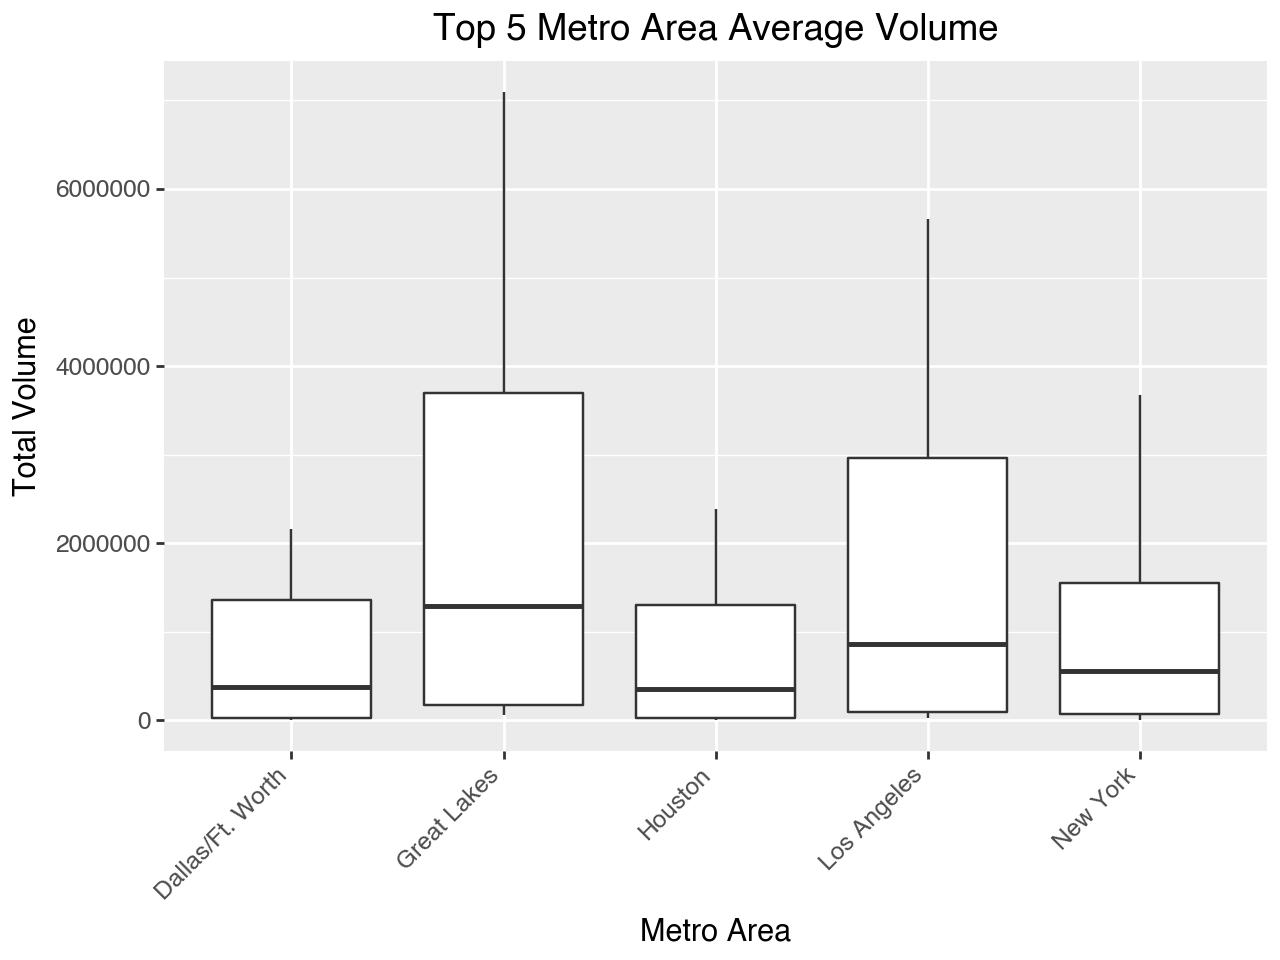

In [17]:
## filter by MetroArea
dfMetro = avData[(avData['region_type'] == 'MetroArea')]

## average the total volume by MetroArea
dfMetroAv = dfMetro.groupby('geography')['total_volume'].mean().reset_index()

## find MetroArea where the total volume 
highestMetro = dfMetroAv.loc[dfMetroAv['total_volume'].idxmax()]
top5Metro = dfMetroAv.nlargest(5, 'total_volume')

top5 = top5Metro['geography'].tolist()

top5Full = dfMetro[dfMetro['geography'].isin(top5)]

(ggplot(top5Full, aes(x='geography', y='total_volume')) + \
    geom_boxplot() + \
    labs(title='Top 5 Metro Area Average Volume',
         x='Metro Area',
         y='Total Volume') + \
    theme(axis_text_x=element_text(rotation=45, hjust=1)))


The highest total volume came in the Great Lakes metro area at 1994196.

### 6 From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [24]:

caliCity = ['Los Angeles', 'Sacramento', 'San Diego', 
              'San Francisco']

# Function to categorize geography into new variable cali 

#-----------

#input Vector: string a list, array of strings or pandas series of strings

#return String 


#-----------
def categorize_cali(city):
    if city in caliCity:
        return 'California'
    else:
        return 'Other'

# Apply the function to create a new column 'region_type'
avData['cali'] = avData['geography'].apply(categorize_cali)


### 7 In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

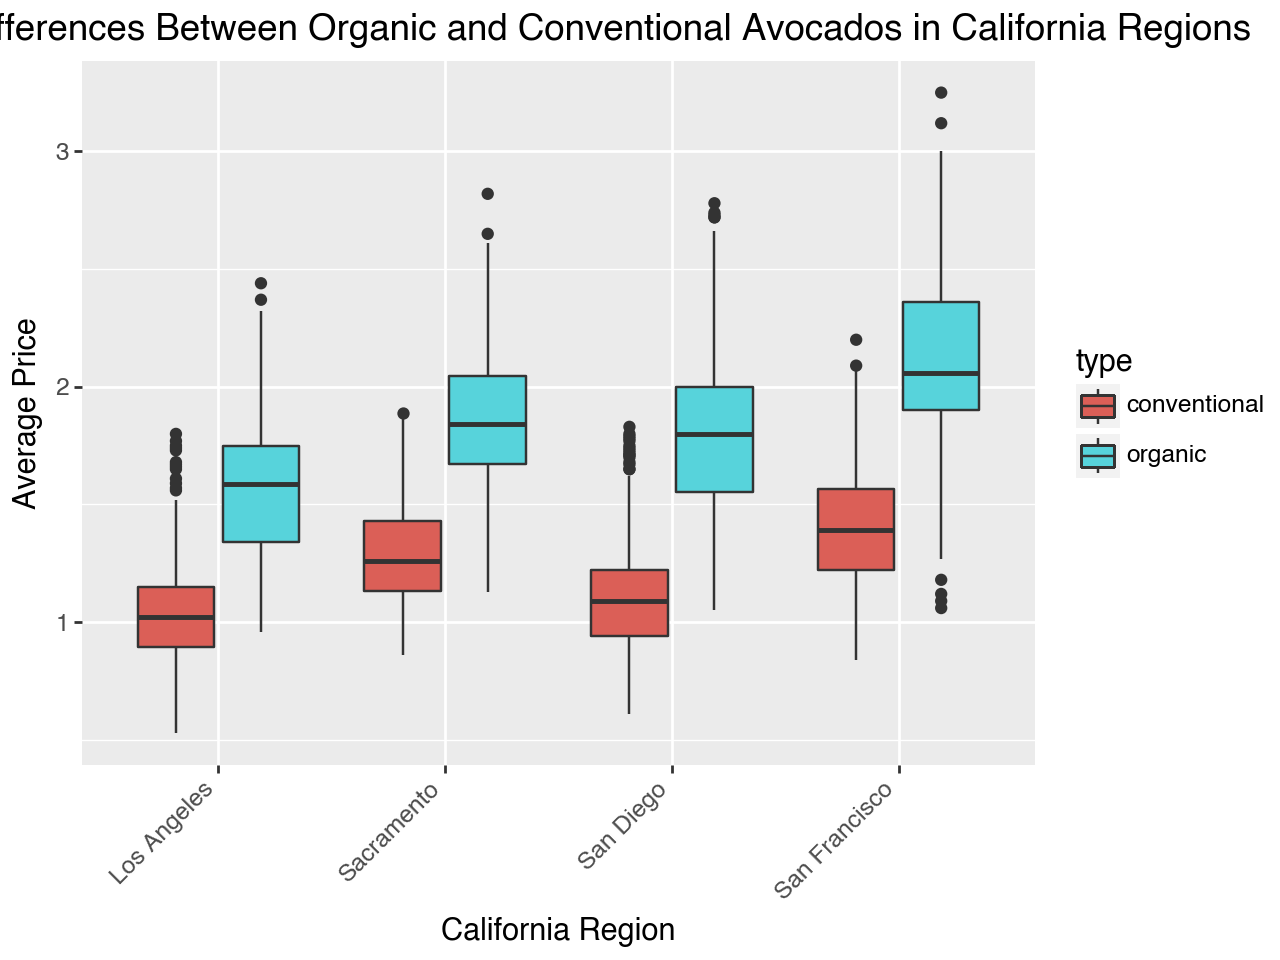

In [23]:
dfCali = avData[(avData['cali'] == 'California')]


priceDiff = dfCali.groupby(['geography', 'type'])['average_price'].mean().unstack()

#Calculate price difference (organic - conventional)
priceDiff['price_difference'] = priceDiff['organic'] - priceDiff['conventional']

#Display summary statistics
print(priceDiff)

#Reshape data for visualization
caliViz= dfCali[['geography', 'type', 'average_price']]

#Visualization of price differences between organic and conventional
(ggplot(caliViz, aes(x='geography', y='average_price', fill='type')) + \
geom_boxplot() + \
labs(title='Price Differences Between Organic and Conventional Avocados in California Regions',
    x='California Region',
    y='Average Price') + \
theme(axis_text_x=element_text(rotation=45, hjust=1)))



The highest price difference between organic and conventional comes from the California region of San Francisco at .72 

### 8 The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

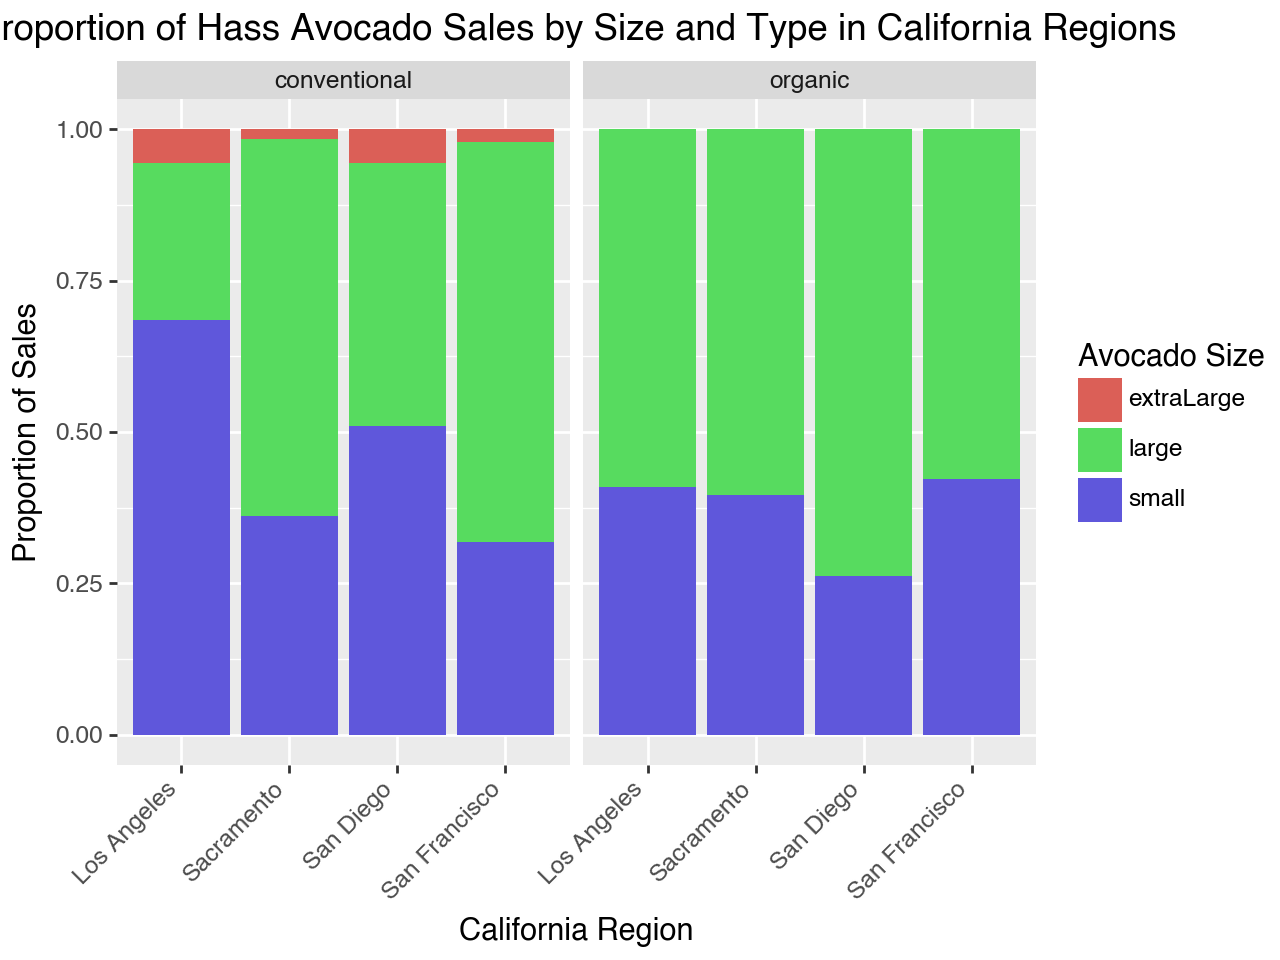

In [20]:

#Reshape the data from wide to long format using pd.melt()
long = pd.melt(dfCali, id_vars=['geography', 'type'], 
                    value_vars=['small', 'large', 'extraLarge'], 
                    var_name='size', 
                    value_name='sales')

#Calculate the proportion of sales 
long['proportion'] = long.groupby(['geography', 'type'])['sales'].transform(lambda x: x / x.sum())

#Create the stacked bar plot
(ggplot(long, aes(x='geography', y='proportion', fill='size')) +
geom_bar(stat='identity', position='stack') +
labs(title='Proportion of Hass Avocado Sales by Size and Type in California Regions',
     x='California Region',
     y='Proportion of Sales',
     fill='Avocado Size') +
     facet_wrap('~type') + 
theme(axis_text_x=element_text(rotation=45, hjust=1)))


### Using Outside Data

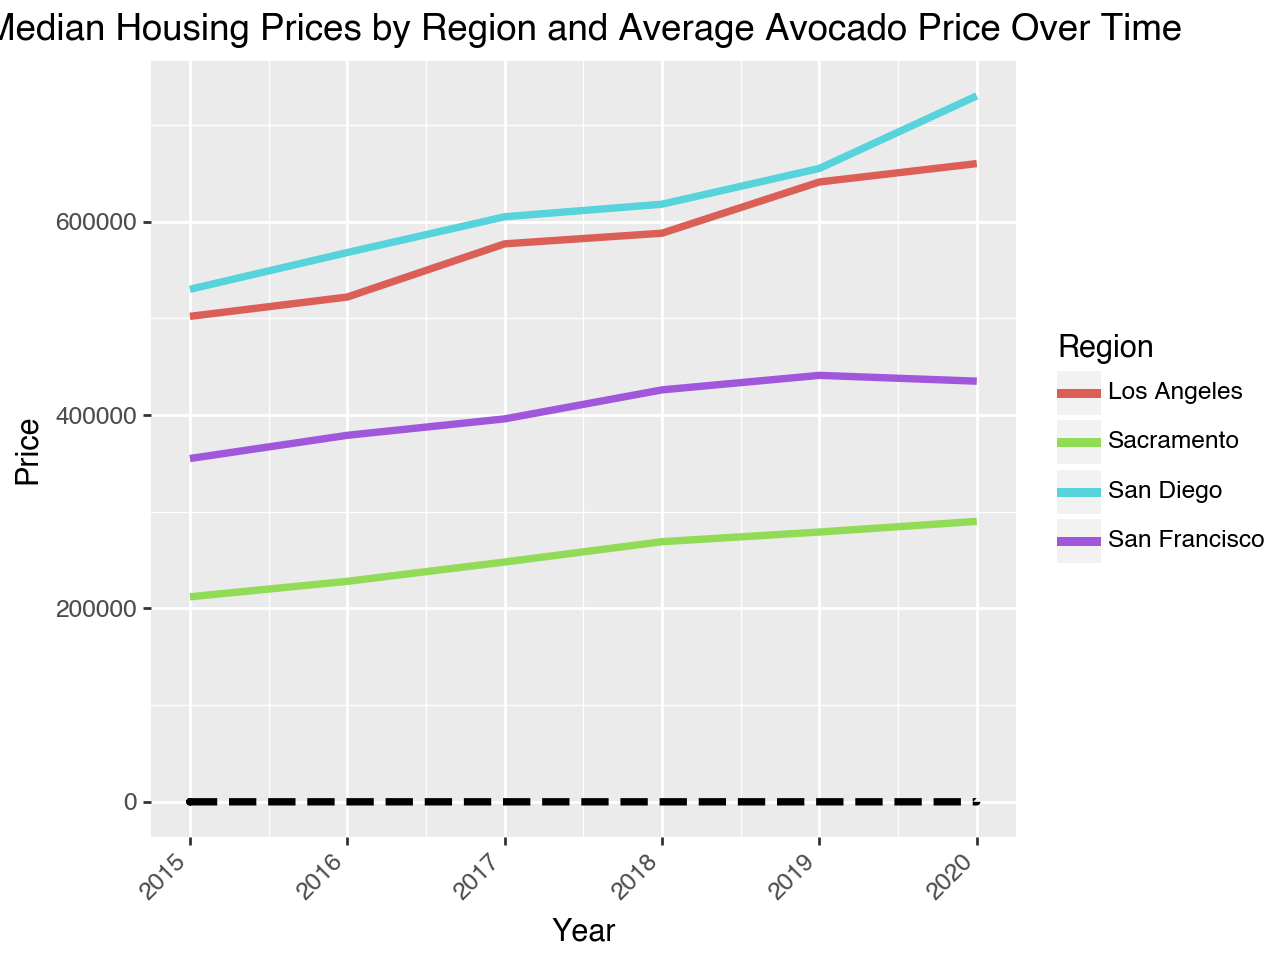

In [21]:
# LA and SD median housing sourced https://www.laalmanac.com/economy/ec37.php
# SF median housing sourced https://fred.stlouisfed.org/series/ATNHPIUS41884Q
# Sacramento median housing sourced https://fred.stlouisfed.org/series/ATNHPIUS40900Q

housingData= pd.DataFrame({
    'geography': ['San Francisco', 'San Francisco', 'San Francisco', 'San Francisco', 'San Francisco', 'San Francisco', 'San Diego', 'San Diego', 'San Diego', 'San Diego', 'San Diego', 'San Diego', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Sacramento', 'Sacramento','Sacramento', 'Sacramento', 'Sacramento', 'Sacramento'],
    'year': [2015,2016,2017,2018,2019,2020,2015,2016,2017,2018,2019,2020,2015,2016,2017,2018,2019,2020,2015,2016,2017,2018,2019,2020],
    'median_housing_price': [355000,379000,396000,426000,441000,435000,530000,568000,605000,618000,655000,730000,502000,522000,577000,588000,641000,660000,212000,228000,248000,269000,279000,290000]
})

mergedCali= pd.merge(dfCali, housingData, left_on=['geography', 'year'], right_on=['geography', 'year'], how='left')


#Create the line plot with separate lines for each region
(ggplot(mergedCali, aes(x='year', y='median_housing_price', color='geography')) +
geom_line(size=1.5) + 
geom_line(aes(x='year', y='average_price'), data=mergedCali, color='black', size=1.5, linetype='dashed') +
labs(title='Median Housing Prices by Region and Average Avocado Price Over Time',
                     x='Year', y='Price', color='Region') +
theme(axis_text_x=element_text(rotation=45, hjust=1)))


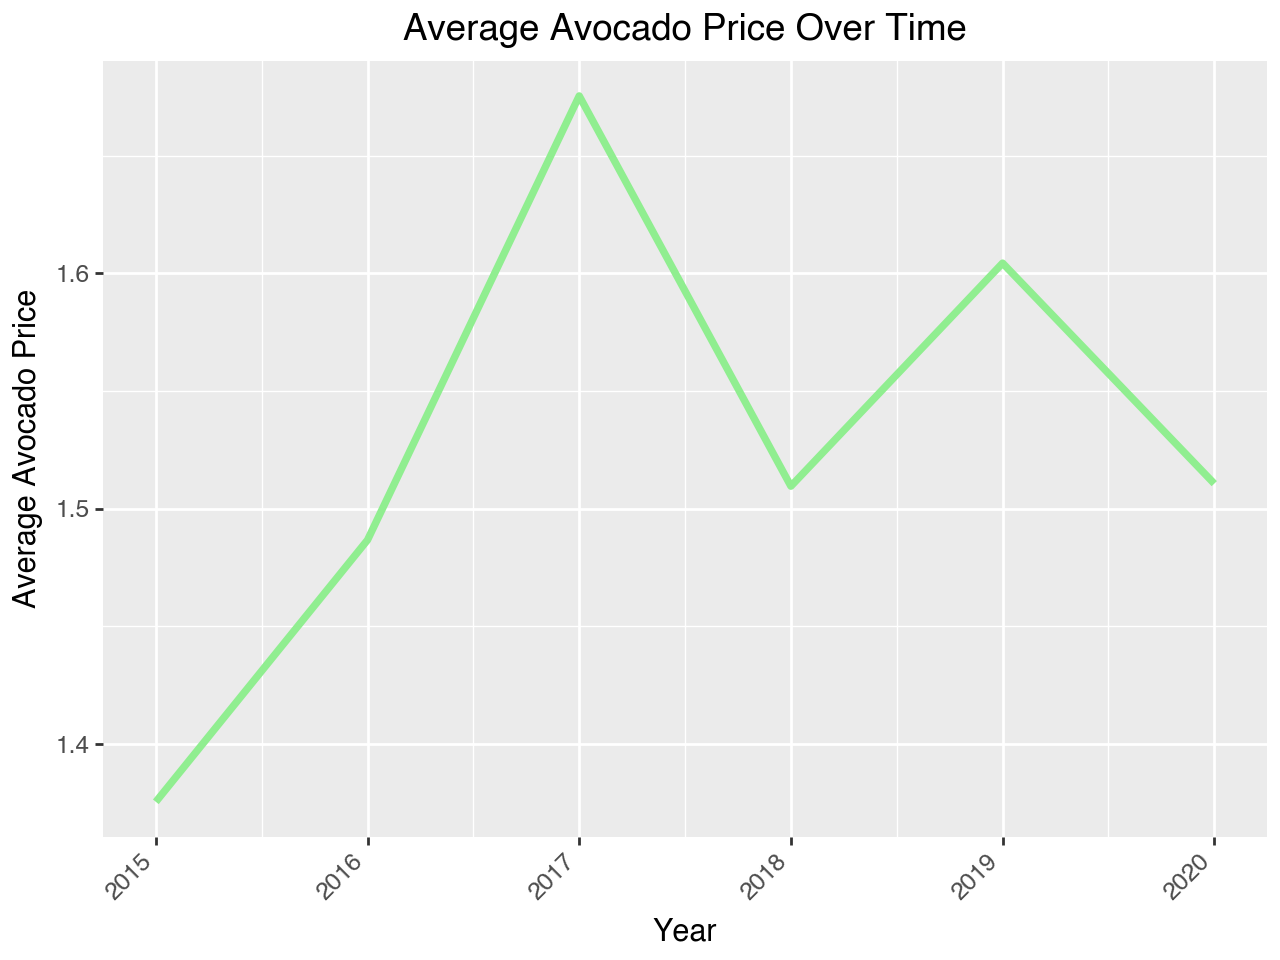

In [22]:
# Just the avacados alone so scale won't skew perception 
avgPrice = mergedCali.groupby('year').agg(
    avg_avocado_price=('average_price', 'mean')
).reset_index()


(ggplot(avgPrice, aes(x='year', y='avg_avocado_price')) +
    geom_line(color='lightgreen', size=1.5) +
    labs(title='Average Avocado Price Over Time',
    x='Year', y='Average Avocado Price') +
    theme(axis_text_x=element_text(rotation=45, hjust=1)))

<P> Growth of house prices have skyrocketed while the price of an avacado has not gone up by much. Housing in California has grown by at least 25% in each major metro area, from 2015-2020, while the avacado has grown about 8%. Seemingly the avacados are much more in reach while the opprotunity to buy a house has gotten furhter away. <p>

###### Used ChatGPT to assist me in coding mainly in tailoring plots and writing the first function to sort the region.